In [1]:
import numpy as np
import pandas as pd

In [3]:
train_df  = pd.read_csv("ml_train.csv")
train_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,...,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,...,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,...,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,...,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,...,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,...,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


In [4]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration    1199999 non-

In [5]:
train_df.isnull().sum()

id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

In [6]:
test_df = pd.read_csv("ml_test.csv")
test_df.head()

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 800000 entries, 0 to 799999
Data columns (total 20 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    800000 non-null  int64  
 1   Age                   787511 non-null  float64
 2   Gender                800000 non-null  object 
 3   Annual Income         770140 non-null  float64
 4   Marital Status        787664 non-null  object 
 5   Number of Dependents  726870 non-null  float64
 6   Education Level       800000 non-null  object 
 7   Occupation            560875 non-null  object 
 8   Health Score          750551 non-null  float64
 9   Location              800000 non-null  object 
 10  Policy Type           800000 non-null  object 
 11  Previous Claims       557198 non-null  float64
 12  Vehicle Age           799997 non-null  float64
 13  Credit Score          708549 non-null  float64
 14  Insurance Duration    799998 non-null  float64
 15  

In [8]:
test_df.isnull().sum()

id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location                     0
Policy Type                  0
Previous Claims         242802
Vehicle Age                  3
Credit Score             91451
Insurance Duration           2
Policy Start Date            0
Customer Feedback        52276
Smoking Status               0
Exercise Frequency           0
Property Type                0
dtype: int64

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Distribution of Target Variable: Premium Amount')

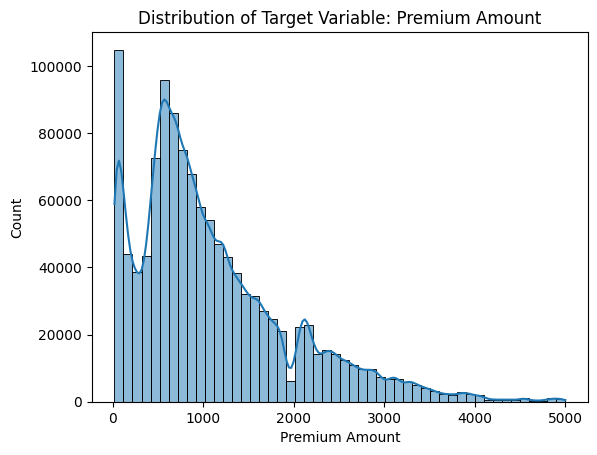

In [10]:
sns.histplot(train_df['Premium Amount'], bins=50, kde=True)
plt.title("Distribution of Target Variable: Premium Amount")

Suburban    401542
Rural       400947
Urban       397511
Name: Location, dtype: int64


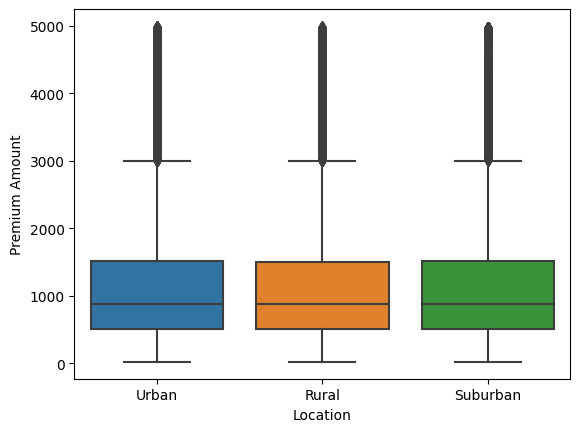

In [11]:
print(train_df['Location'].value_counts())
sns.boxplot(x='Location', y='Premium Amount', data=train_df)
plt.show()

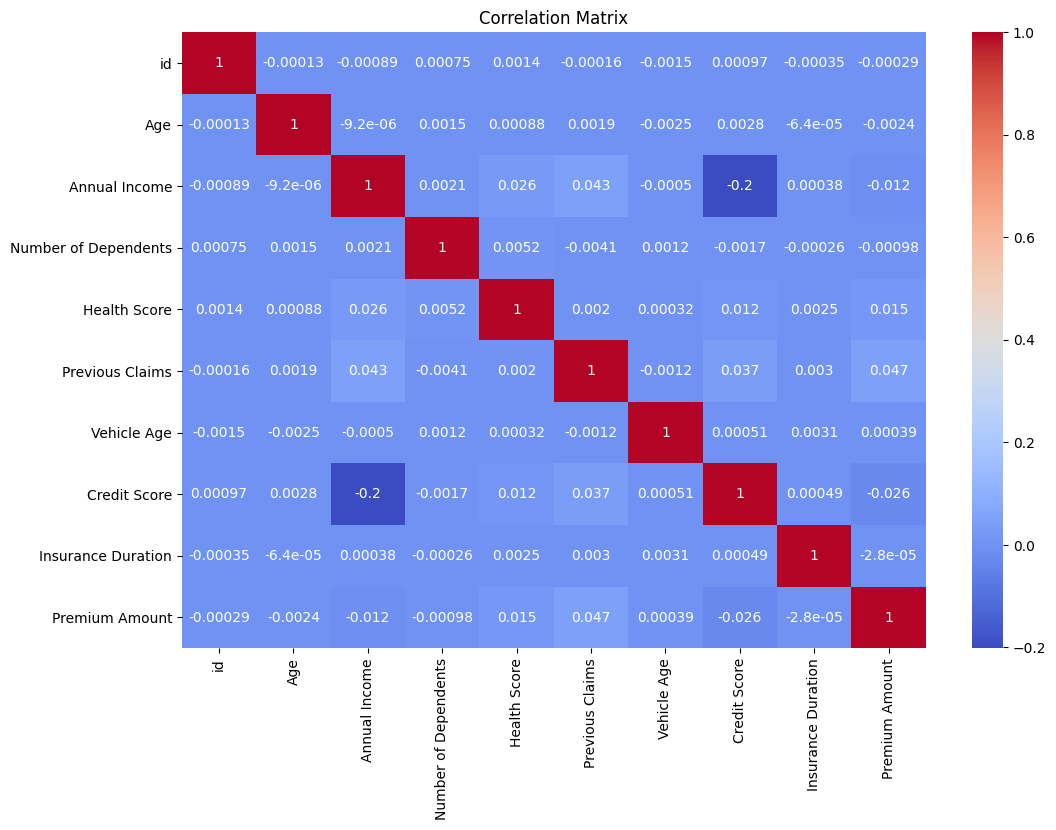

In [12]:
plt.figure(figsize=(12, 8))
sns.heatmap(train_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

In [13]:
columns_to_drop = [
    'Number of Dependents',
    'Customer Feedback',
    'Occupation',  # Drop entire column to remove 'Employed'
    'Smoking Status',
    'Property Type',
    'Education Level'  # Drop entire column to remove High School & PhD
]

train_df = train_df.drop(columns=[col for col in columns_to_drop if col in train_df.columns], errors='ignore')
test_df = test_df.drop(columns=[col for col in columns_to_drop if col in test_df.columns], errors='ignore')

In [14]:
y = train_df['Premium Amount']
train_df.drop('Premium Amount', axis=1, inplace=True)


In [15]:
current_date = pd.Timestamp.now()
train_df['Policy Start Date'] = pd.to_datetime(train_df['Policy Start Date'])
test_df['Policy Start Date'] = pd.to_datetime(test_df['Policy Start Date'])
train_df['Policy_Age_Days'] = (current_date - train_df['Policy Start Date']).dt.days
test_df['Policy_Age_Days'] = (current_date - test_df['Policy Start Date']).dt.days


In [16]:
cols_to_drop = ['id', 'Policy Start Date']
train_df.drop(cols_to_drop, axis=1, inplace=True)
test_df.drop(cols_to_drop, axis=1, inplace=True)

In [17]:
ordinal_features = ['Exercise Frequency']
ordinal_categories = [['Rarely', 'Monthly', 'Weekly', 'Daily']]

# Dynamically get feature types
numeric_features = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = train_df.select_dtypes(include=['object', 'category', 'bool']).columns.tolist()

In [18]:
for col in ordinal_features:
    if col in categorical_features:
        categorical_features.remove(col)


In [19]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, RobustScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [20]:
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', sparse=False))
])

ordinal_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('ordinal', OrdinalEncoder(categories=ordinal_categories))
])

In [21]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ord', ordinal_transformer, ordinal_features)
    ]
)

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(train_df, y, test_size=0.2, random_state=42)

In [23]:
X_train = preprocessor.fit_transform(X_train)
X_val = preprocessor.transform(X_val)
test_df_processed = preprocessor.transform(test_df)

In [24]:
feature_names = (
    numeric_features +
    list(preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names(categorical_features)) +
    ordinal_features
)


In [25]:
X_train = pd.DataFrame(X_train, columns=feature_names)
X_val = pd.DataFrame(X_val, columns=feature_names)
test_df = pd.DataFrame(test_df_processed, columns=feature_names)

In [27]:
X_train.columns

Index(['Age', 'Annual Income', 'Health Score', 'Previous Claims',
       'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy_Age_Days',
       'Gender_Female', 'Gender_Male', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Exercise Frequency'],
      dtype='object')

In [28]:
import mlflow
from mlflow.models.signature import infer_signature
mlflow.set_tracking_uri("file:///mlruns")  # Local file storage
mlflow.set_experiment("Insurance_Premium_LightGBM_maybefinal")

2025/07/29 22:28:37 INFO mlflow.tracking.fluent: Experiment with name 'Insurance_Premium_LightGBM_maybefinal' does not exist. Creating a new experiment.


<Experiment: artifact_location='file:///C:/mlruns/817808076222825173', creation_time=1753808317680, experiment_id='817808076222825173', last_update_time=1753808317680, lifecycle_stage='active', name='Insurance_Premium_LightGBM_maybefinal', tags={}>

In [30]:
import mlflow
import pickle
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV, TimeSeriesSplit
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_squared_log_error


# 2. Hyperparameter Tuning with MLflow Tracking
with mlflow.start_run(run_name="LGBM_Tuned_Optimized") as run:
    # Hyperparameter Grid
    param_grid = {
        'learning_rate': [0.05, 0.1],
        'max_depth': [3, 5],
        'num_leaves': [15, 31],
        'min_child_samples': [20, 30],
        'reg_alpha': [0, 0.1],
        'reg_lambda': [0, 0.1],
    }

    # Base model
    lgbm = lgb.LGBMRegressor(
        n_estimators=25,
        random_state=42,
        verbose=-1,
        n_jobs=-1,
        force_row_wise=True
    )

    # Randomized SearchCV
    search = RandomizedSearchCV(
        estimator=lgbm,
        param_distributions=param_grid,
        n_iter=10,
        scoring='neg_root_mean_squared_error',
        cv=TimeSeriesSplit(n_splits=3),
        verbose=2,
        random_state=42,
        n_jobs=-1
    )

    # Fit search
    search.fit(X_train, y_train)

    # Final model with best params
    final_lgbm = lgb.LGBMRegressor(
        n_estimators=200,
        **search.best_params_,
        random_state=42,
        verbose=-1,
        n_jobs=-1,
        force_row_wise=True
    )

    # Fit final model
    final_lgbm.fit(X_train, y_train)

    # Predictions and Metrics
    y_val_pred = final_lgbm.predict(X_val)

    val_metrics = {
        "val_RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
        "val_MAE": mean_absolute_error(y_val, y_val_pred),
        "val_R2": r2_score(y_val, y_val_pred),
        "val_MSLE": mean_squared_log_error(y_val, y_val_pred)
    }

    # Log best params and metrics to MLflow
    mlflow.log_params(search.best_params_)
    mlflow.log_param("final_n_estimators", 200)
    mlflow.log_metrics(val_metrics)

    # Save model to .pkl
    model_path = "new_insurance_model.pkl"
    with open(model_path, "wb") as f:
        pickle.dump(final_lgbm, f)

    # Save expected columns
    expected_columns_path = "expected_col.pkl"
    expected_columns = X_train.columns.tolist()
    with open(expected_columns_path, "wb") as f:
        pickle.dump(expected_columns, f)

    # Log .pkl artifacts
    mlflow.log_artifact(model_path)
    mlflow.log_artifact(expected_columns_path)

    # Output
    print(f"\n=== Final Results ===")
    print(f"Best RMSE: {val_metrics['val_RMSE']:.4f}")
    print(f"Best parameters: {search.best_params_}")
    print(f"Model saved as {model_path}")

Fitting 3 folds for each of 10 candidates, totalling 30 fits

=== Final Results ===
Best RMSE: 845.4649
Best parameters: {'reg_lambda': 0, 'reg_alpha': 0, 'num_leaves': 31, 'min_child_samples': 20, 'max_depth': 5, 'learning_rate': 0.1}
Model saved as new_insurance_model.pkl


In [31]:
def load_and_evaluate():
    try:
        # Load model
        with open('new_insurance_model.pkl', 'rb') as f:
            model = pickle.load(f)
        
        # Load expected columns
        with open('expected_col.pkl', 'rb') as f:
            expected_columns = pickle.load(f)

        # Ensure X_val has same columns in same order
        if list(X_val.columns) != expected_columns:
            raise ValueError("Mismatch in expected columns and validation set columns.")

        # Generate predictions
        y_val_pred = model.predict(X_val)

        # Calculate evaluation metrics
        metrics = {
            "RMSE": np.sqrt(mean_squared_error(y_val, y_val_pred)),
            "MAE": mean_absolute_error(y_val, y_val_pred),
            "R2": r2_score(y_val, y_val_pred),
            "MSLE": mean_squared_log_error(y_val, y_val_pred)
        }

        # Print metrics
        print("\n=== Model Evaluation ===")
        for key, value in metrics.items():
            print(f"{key}: {value:.4f}")

        return model, expected_columns

    except FileNotFoundError as fnf_error:
        print(f"Model or column file not found: {fnf_error}")
        raise
    except Exception as e:
        print(f"Error during model evaluation: {str(e)}")
        raise


In [32]:
# 4. Generate Submission File
def create_submission(model, test_data, template_path="ml_submission.csv"):
    try:
        # Load template
        submission = pd.read_csv(template_path)
        
        # Generate predictions
        predictions = model.predict(test_data)
        
        # Update submission
        if 'Premium Amount' in submission.columns:
            submission['Premium Amount'] = predictions
        elif 'Premium_Amount' in submission.columns:
            submission['Premium_Amount'] = predictions
        else:
            # Fallback to first numeric column
            num_cols = submission.select_dtypes(include=np.number).columns
            submission[num_cols[0]] = predictions
        
        # Save
        submission.to_csv("final_submission_lgbm_4.csv", index=False)
        print("Submission file created: final_submission_lgbm_4.csv")
        
    except Exception as e:
        print(f"Error creating submission: {str(e)}")
        raise

In [33]:
# Execute pipeline
if __name__ == "__main__":
    # Load and evaluate
    model, expected_columns = load_and_evaluate()
    
    # Create submission (if test data available)
    if 'test_df' in globals():
        create_submission(model, test_df)


=== Model Evaluation ===
RMSE: 845.4649
MAE: 644.6923
R2: 0.0435
MSLE: 1.3160
Submission file created: final_submission_lgbm_4.csv


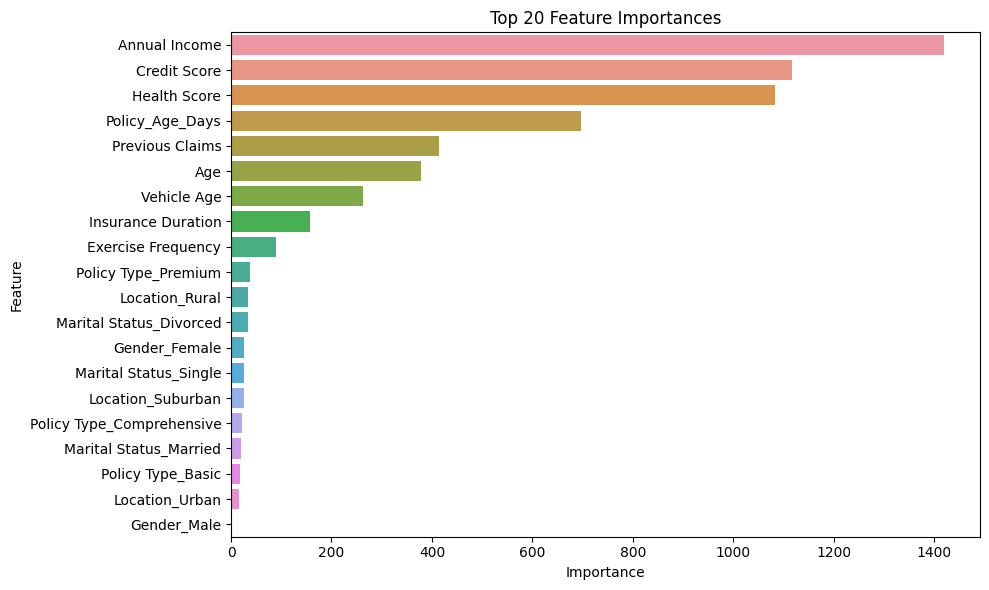

In [34]:
# Feature importance plot
importances = final_lgbm.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df.head(20), x='Importance', y='Feature')
plt.title("Top 20 Feature Importances")
plt.tight_layout()
plt.show()

In [35]:
X_train.columns

Index(['Age', 'Annual Income', 'Health Score', 'Previous Claims',
       'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy_Age_Days',
       'Gender_Female', 'Gender_Male', 'Marital Status_Divorced',
       'Marital Status_Married', 'Marital Status_Single', 'Location_Rural',
       'Location_Suburban', 'Location_Urban', 'Policy Type_Basic',
       'Policy Type_Comprehensive', 'Policy Type_Premium',
       'Exercise Frequency'],
      dtype='object')